Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [34]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
#### Load the movies dataset 
auto_df = pd.read_csv('automobile.txt')

In [38]:
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [40]:
# View the description of the numerical dataset
auto_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['symboling', 'normalized-losses', 'engine-location']` from the data set as they will not be used in the analysis.

In [42]:
# Drop/Remove redundant columns
auto_df = auto_df.drop(columns=['symboling', 'normalized-losses', 'engine-location'], axis=1)
auto_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Remove any duplicate rows

In [44]:
# Extract the duplicated rows in the auto dataset
duplicates = auto_df[auto_df.duplicated() == 1]

# Remove/Drop the duplicated rows in the movies DataFrame
auto_df = auto_df.drop_duplicates()

#### Treatment of missing data 

The missing data in the auto dataset is represented by '?'. We can replace these in by NaN.

<Axes: >

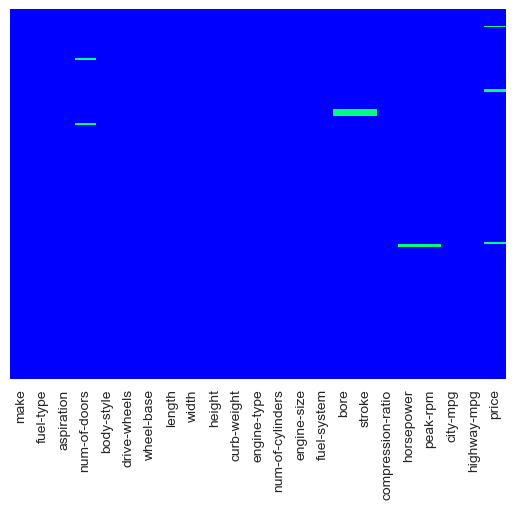

In [57]:
# Convert ? to NaN
auto_df = auto_df.replace(to_replace='?', value=np.nan)

# Plot a heatmap to visually view the missing data points int he dataframe
#sns.set_style('dark')
sns.heatmap(auto_df.isnull(), yticklabels=False, cbar=False, cmap='winter')

In [59]:
# Alternative manner to view the successful convertion of missing value to NaN
auto_df.isna().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

The missing values in the numerical features `['bore', 'stroke', 'horsepower','peak-rpm']` can be replaced with median() of each column.

The missing values in the categorical feature `['num-of-doors']` can be replaced with the mode().

The missing values in the dependent categorical feature `[price]` will be removed from the dataframe.

In [64]:
# Replace the numerical features with the median
features = ['bore', 'stroke', 'horsepower','peak-rpm']
for feature in features:
    mdn = auto_df[feature].median(axis=0)
    auto_df[feature].replace(np.nan, mdn, inplace=True)

In [70]:
# Replace the categorical feature with the mode()

# The most frequent element in column 'num-of-doors
print(auto_df['num-of-doors'].mode()[0])

auto_df['num-of-doors'].fillna(auto_df['num-of-doors'].mode()[0], inplace=True)

four


In [78]:
# Remove rows with missing price in the dataframe

# Keep every row where price has no missing values
auto_df = auto_df.dropna(subset = ['price'], axis=0)

In [80]:
# verify removal of all the missing values
auto_df.isnull().sum().sum()

0

In [82]:
auto_df.dtypes

make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Change data types
To manipulate the columns easily, it is important that we make use of the python objects. We change the data types of the folowing numerical features which have been designated as objects

Change bore, stroke, horsepower, peak-rpm and price columns to a float data type

In [88]:
# Change the datatype of numerical to float and int
auto_df = auto_df.astype({'bore':'float','stroke':'float','horsepower':'float','peak-rpm':'float','price':'float'})

# View information on the features
auto_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               201 non-null    object 
 1   fuel-type          201 non-null    object 
 2   aspiration         201 non-null    object 
 3   num-of-doors       201 non-null    object 
 4   body-style         201 non-null    object 
 5   drive-wheels       201 non-null    object 
 6   wheel-base         201 non-null    float64
 7   length             201 non-null    float64
 8   width              201 non-null    float64
 9   height             201 non-null    float64
 10  curb-weight        201 non-null    int64  
 11  engine-type        201 non-null    object 
 12  num-of-cylinders   201 non-null    object 
 13  engine-size        201 non-null    int64  
 14  fuel-system        201 non-null    object 
 15  bore               201 non-null    float64
 16  stroke             201 non-null

In [90]:
# We can reset the index of the dataframe
auto_df = auto_df.reset_index(drop=True)

auto_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


On checking the dataset, we can evaluate the correlation of the numerical columns.

In [93]:
# Correlations on columns with numerical values
auto_df.corr(numeric_only=True)

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494065,0.156740,0.250313,0.372156,-0.360946,-0.470606,-0.543304,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.609557,0.123016,0.159733,0.578683,-0.285301,-0.665192,-0.698142,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544986,0.188605,0.189867,0.614146,-0.245273,-0.633531,-0.680635,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.182946,-0.064380,0.259737,-0.086078,-0.310513,-0.049800,-0.104812,0.135486
curb-weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644434,0.166809,0.156433,0.757961,-0.279429,-0.749543,-0.794889,0.834415
engine-size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.574504,0.203043,0.028889,0.822167,-0.256503,-0.650546,-0.679571,0.872335
bore,0.494065,0.609557,0.544986,0.182946,0.644434,0.574504,1.000000,-0.055539,0.001544,0.565324,-0.269301,-0.580059,-0.589613,0.543158
stroke,0.156740,0.123016,0.188605,-0.064380,0.166809,0.203043,-0.055539,1.000000,0.187434,0.093555,-0.056336,-0.036823,-0.037100,0.082209
compression-ratio,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001544,0.187434,1.000000,-0.213556,-0.436287,0.331425,0.268465,0.071107
horsepower,0.372156,0.578683,0.614146,-0.086078,0.757961,0.822167,0.565324,0.093555,-0.213556,1.000000,0.107455,-0.821171,-0.804490,0.810500


<Axes: >

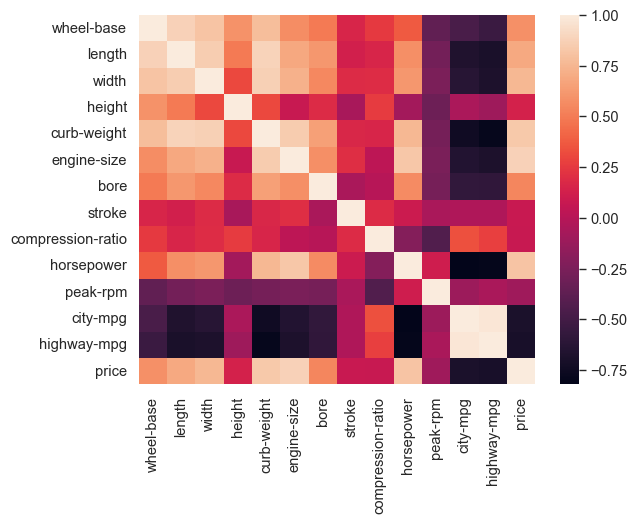

In [170]:
# Graph the heatmap of the above correlations
sns.heatmap(auto_df.corr(numeric_only=True))

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which engine type have maximum peak-rpm? 
How do the most engine types compare? 

In [103]:
# Engine type have peak-rpm
auto_max_rpm = auto_df.groupby(['engine-type']).max()['peak-rpm']
auto_max_rpm


engine-type
dohc     6600.0
l        5600.0
ohc      6000.0
ohcf     5900.0
ohcv     5500.0
rotor    6000.0
Name: peak-rpm, dtype: float64

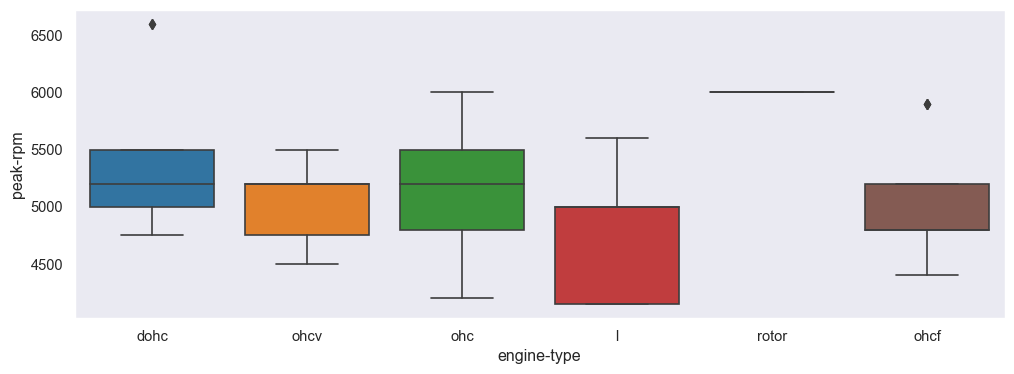

In [160]:
# Create figure size
fig =plt.figure(figsize=(12,4))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('dark')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=1.2)

sns.boxplot(data=auto_df,x='engine-type',y='peak-rpm')

plt.show()


#### Which body-style has high curb-weight on average? 
Compare body-style to curb-weight. The comparison helps us identify body-types that are light on the road.

In [117]:
# Body_style with biggest wheel base on average
auto_curb_weight = auto_df.groupby(['body-style']).mean(numeric_only=True)['curb-weight']
auto_curb_weight


body-style
convertible    2801.666667
hardtop        2810.625000
hatchback      2322.852941
sedan          2625.893617
wagon          2784.240000
Name: curb-weight, dtype: float64

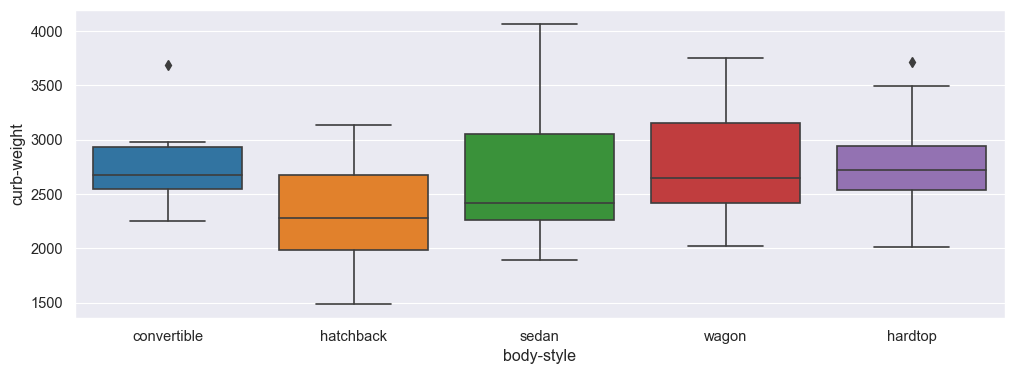

In [168]:
# Create figure size
fig =plt.figure(figsize=(12,4))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('darkgrid')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=1.2)

sns.boxplot(data=auto_df,x='body-style',y='curb-weight')

plt.show()


#### Fuel efficiency to drive in the city/vs highway?

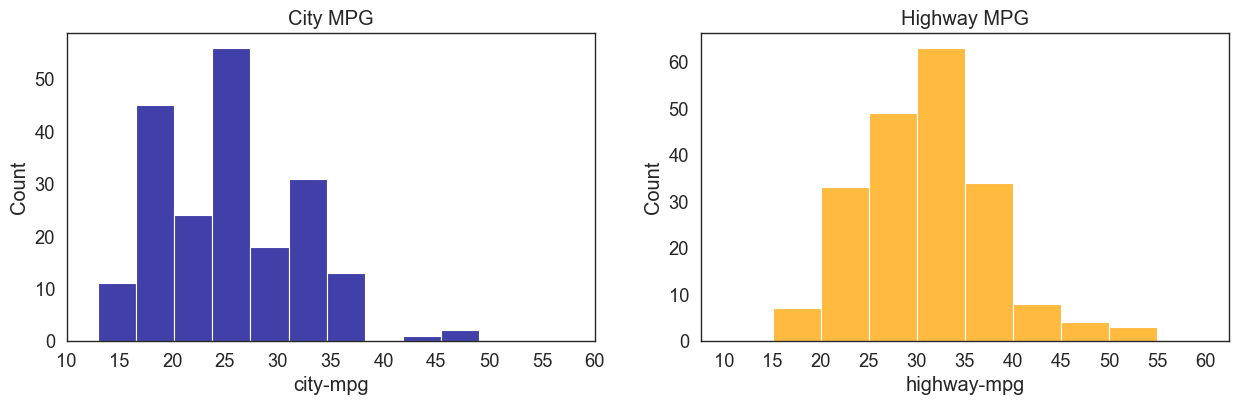

In [132]:
# Create figure size
fig =plt.figure(figsize=(15,4))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('white')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=1.5)

ax0 = plt.subplot(1,2,1)
ax1 = plt.subplot(1,2,2)

# Prepare bins for thew histogram distribution
bins = [10,15,20,25,30,35,40,45,50,55,60]

sns.histplot(data=auto_df, x='city-mpg', color='darkblue', ax=ax0)
ax0.set_title("City MPG")
ax0.set_xticks(bins)

sns.histplot(data=auto_df, x='highway-mpg', color='orange',bins=bins, ax=ax1)
ax1.set_title("Highway MPG")
ax1.set_xticks(bins)

plt.show()



It is proving to be more fuel efficient to drive in the city as compared to be driving on the highway.

#### How does car Make influence the car Price?
Create a box plot explaining the price feature.

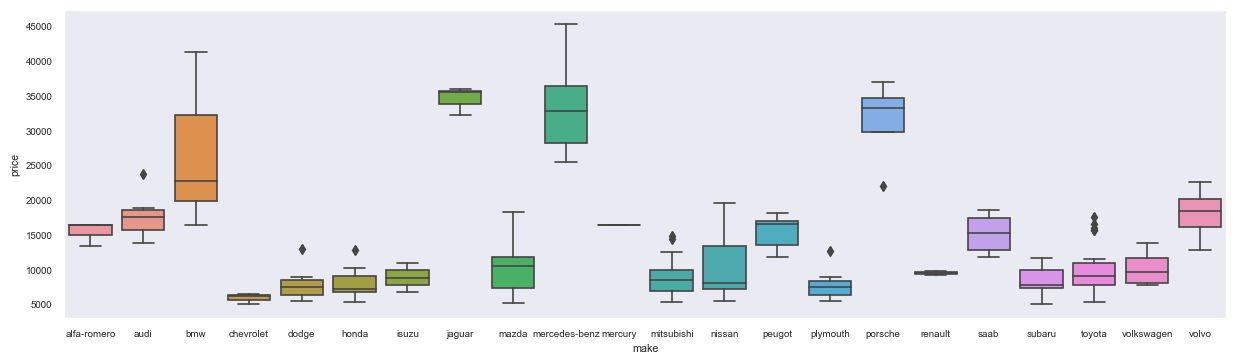

In [141]:
# Create figure size
fig =plt.figure(figsize=(15,4))

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('dark')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=0.8)

sns.boxplot(data=auto_df,x='make',y='price')

plt.show()


There is certain level of varibility among the distributions of the various car makers.

The disctinction is clear between entry level and mid-level compared to the high end car makers.

There would be no price without the car manufactures.

#### How is the price relationship with a selected numerical features (highway-mpg, horsepower, engine-size)
This has the potential to indicate which features can be good price predictors, in price model.

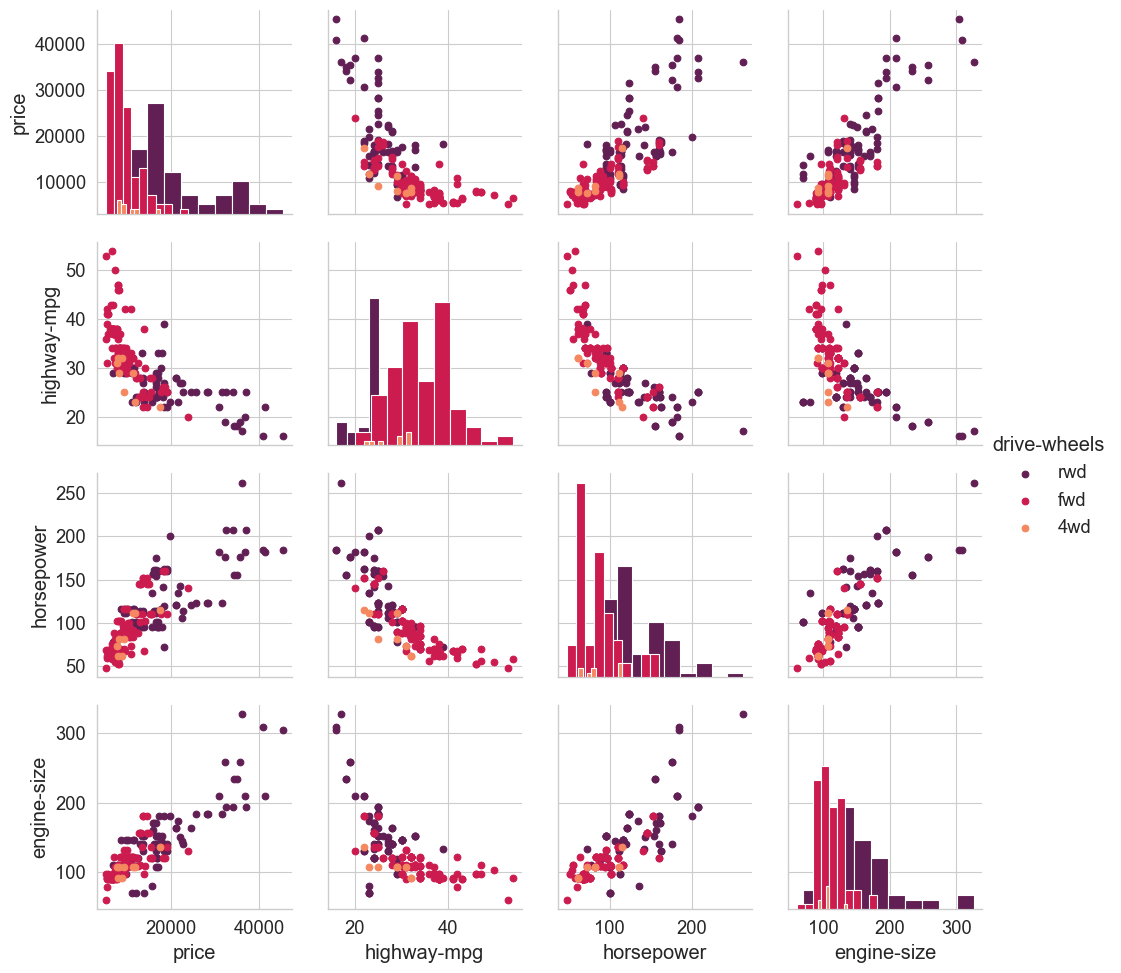

In [150]:
# Generate as pair grid of some of the numerical features

# set the style for axis and grids to white ----> dark, white, darkgrid, whitegrid
sns.set_style('whitegrid')

# give presentation context via 'paper' ---> paper/talk/poster
sns.set_context('paper', font_scale=1.5)

# create a sub dataframe for profit_earned, revenue, budget
auto_subset = auto_df[['price','highway-mpg','horsepower','engine-size','body-style','drive-wheels']]

# Make a grid from this subset
auto_grid = sns.PairGrid(auto_subset, hue='drive-wheels', palette='rocket')

# Scatter plot across the upper lower and diagonal
auto_grid.map_diag(plt.hist)
auto_grid.map_offdiag(plt.scatter)

auto_grid.add_legend()
plt.show()
